#Logistic Regression, Decision tree, SVM, KNN

In [1]:
import pandas as pd
import numpy as np
#import pandas_profiling as pp
df=pd.read_csv('credit_test.csv')
df.info()
#profile=df.profile_report(title="bank credit")
#profile.to_file(output_file="bank_credit.html")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
Loan ID                         10000 non-null object
Customer ID                     10000 non-null object
Current Loan Amount             10000 non-null int64
Term                            10000 non-null object
Credit Score                    8019 non-null float64
Annual Income                   8019 non-null float64
Years in current job            9573 non-null object
Home Ownership                  10000 non-null object
Purpose                         10000 non-null object
Monthly Debt                    10000 non-null float64
Years of Credit History         10000 non-null float64
Months since last delinquent    4694 non-null float64
Number of Open Accounts         10000 non-null int64
Number of Credit Problems       10000 non-null int64
Current Credit Balance          10000 non-null int64
Maximum Open Credit             10000 non-null int64
Bankruptcies                    

In [2]:
from sklearn.preprocessing import LabelEncoder
Le=LabelEncoder()
Le.fit(df['Home Ownership']) #to form classes of given data
print(Le.transform(df['Home Ownership']))
df['Home Ownership']=Le.transform(df['Home Ownership'])
#df.head()
df['Home Ownership'].dtype

[1 1 3 ... 3 1 1]


dtype('int32')

In [3]:
df.isnull().sum()

Loan ID                            0
Customer ID                        0
Current Loan Amount                0
Term                               0
Credit Score                    1981
Annual Income                   1981
Years in current job             427
Home Ownership                     0
Purpose                            0
Monthly Debt                       0
Years of Credit History            0
Months since last delinquent    5306
Number of Open Accounts            0
Number of Credit Problems          0
Current Credit Balance             0
Maximum Open Credit                0
Bankruptcies                      22
Tax Liens                          1
dtype: int64

In [4]:
df['Credit Score']=df['Credit Score'].fillna(0)
df['Annual Income']=df['Annual Income'].fillna(100000)
df['Bankruptcies']=df['Bankruptcies'].fillna(0)
df.isnull().sum()

Loan ID                            0
Customer ID                        0
Current Loan Amount                0
Term                               0
Credit Score                       0
Annual Income                      0
Years in current job             427
Home Ownership                     0
Purpose                            0
Monthly Debt                       0
Years of Credit History            0
Months since last delinquent    5306
Number of Open Accounts            0
Number of Credit Problems          0
Current Credit Balance             0
Maximum Open Credit                0
Bankruptcies                       0
Tax Liens                          1
dtype: int64

In [5]:
df['Monthly Debt']=df['Monthly Debt'].astype(int)
df['Years of Credit History']=df['Years of Credit History'].astype(int)
df['Credit Score']=df['Credit Score'].astype(int)
df['Annual Income']=df['Annual Income'].astype(int)
df['Home Ownership']=df['Home Ownership'].astype(int)
df['Bankruptcies']=df['Bankruptcies'].astype(int)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
Loan ID                         10000 non-null object
Customer ID                     10000 non-null object
Current Loan Amount             10000 non-null int64
Term                            10000 non-null object
Credit Score                    10000 non-null int32
Annual Income                   10000 non-null int32
Years in current job            9573 non-null object
Home Ownership                  10000 non-null int32
Purpose                         10000 non-null object
Monthly Debt                    10000 non-null int32
Years of Credit History         10000 non-null int32
Months since last delinquent    4694 non-null float64
Number of Open Accounts         10000 non-null int64
Number of Credit Problems       10000 non-null int64
Current Credit Balance          10000 non-null int64
Maximum Open Credit             10000 non-null int64
Bankruptcies                    10000 n

In [6]:
x=df.drop(columns=['Purpose','Loan ID','Customer ID','Term','Years in current job','Purpose','Tax Liens','Bankruptcies',
'Months since last delinquent'])
print(x.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
Current Loan Amount          10000 non-null int64
Credit Score                 10000 non-null int32
Annual Income                10000 non-null int32
Home Ownership               10000 non-null int32
Monthly Debt                 10000 non-null int32
Years of Credit History      10000 non-null int32
Number of Open Accounts      10000 non-null int64
Number of Credit Problems    10000 non-null int64
Current Credit Balance       10000 non-null int64
Maximum Open Credit          10000 non-null int64
dtypes: int32(5), int64(5)
memory usage: 586.1 KB
None


In [7]:
y=df['Bankruptcies']
df[['Bankruptcies','Credit Score']].groupby(df['Bankruptcies']).sum()

,Bankruptcies,Credit Score
Bankruptcies,,
0,0,7686974
1,1022,899757
2,92,36225
3,42,21458
5,5,0


In [8]:
df['Bankruptcies']=df['Bankruptcies'].map({0:0,1:1,2:1,3:1,5:1})
# classification algorithm's target variable should be in categorical(0,1)
#x.info()
#df[['Tax Liens','Bankruptcies']].groupby(df['Tax Liens']).sum()
df['Bankruptcies']

0       0
1       0
2       0
3       1
4       0
       ..
9995    0
9996    0
9997    1
9998    0
9999    0
Name: Bankruptcies, Length: 10000, dtype: int64

In [9]:
df['Bankruptcies'].dtype

dtype('int64')

In [10]:
# model building
#1. Logistic Regression
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.25)
from sklearn.linear_model import LogisticRegression
Lr = LogisticRegression()
Lr.fit(X_train,Y_train)
ypred = Lr.predict(X_test)
print(ypred)

C:\Users\MaheshHiremath\Anaconda3-2019.10\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MaheshHiremath\Anaconda3-2019.10\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[0 0 0 ... 0 0 0]


C:\Users\MaheshHiremath\Anaconda3-2019.10\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Model accuracy:  0.8936
Confusion matrix:
  [[2234    0    0    0]
 [ 254    0    0    0]
 [   9    0    0    0]
 [   3    0    0    0]]
Classification report:
                precision    recall  f1-score   support

           0       0.89      1.00      0.94      2234
           1       0.00      0.00      0.00       254
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00         3

    accuracy                           0.89      2500
   macro avg       0.22      0.25      0.24      2500
weighted avg       0.80      0.89      0.84      2500



<BarContainer object of 2500 artists>

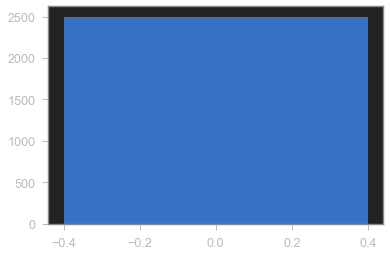

In [13]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(ypred,Y_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,ypred)

from sklearn.metrics import classification_report
cr = classification_report(Y_test,ypred)

print('Model accuracy: ',acc)
print('Confusion matrix:\n ',cm)
print('Classification report:\n ',cr)

import matplotlib.pyplot as plt
plt.bar(ypred,np.arange(len(ypred)),color='r')

[0 0 0 ... 0 0 1]
Accuracy score:  0.9564


<BarContainer object of 2500 artists>

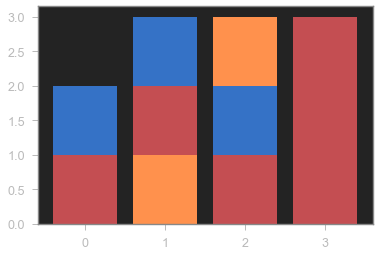

In [21]:
#2. Decission Tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)
dt_predt=dt.predict(X_test)
print(dt_predt)

acc1=accuracy_score(dt_predt,Y_test)
print("Accuracy score: ",acc1)

plt.bar(dt_predt,Y_test,color=['r','b','w','y'])#it shows different graph every time it runs

In [ ]:
#3. SVM
# it takes all the variables in 'int64' format, convert int32 to int64
from sklearn.svm import SVC
sv=SVC(kernel='linear',C=0.001)
sv.fit(X_train,Y_train)
sv_predt=sv.predict(X_test)
print(sv_predt)
acc2=accuracy_score(sv_predt,Y_test)
print("Accuracy score: ",acc2)

In [14]:
#4. KNN
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
kn.fit(X_train,Y_train)
kn_predt=kn.predict(X_test)
print(kn_predt)
acc3=accuracy_score(kn_predt,Y_test)
print('Accuracy score: ',acc3)

[0 0 0 ... 0 0 0]
Accuracy score:  0.8796


In [15]:
#df.to_csv('bank_clean.csv')